In [263]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import json
import cv2
import skvideo.io
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

cwd = "/Users/jonathanlin/Documents/GitHub/research_transfer/datasets/Animal_Kingdom/video_grounding/dataset/"

In [264]:
class ak_vg_dataset(Dataset):
    """dataset for Animal Kingdom"""

    def __init__(self, csv_file, root_dir, transform=None):
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def read_video_cv2(self, video_path, start_time, end_time):
        cap = cv2.VideoCapture(video_path)
        all = []
        i = 0
        start_frame = start_time * 24
        end_frame = end_time * 24
        while cap.isOpened() and i < end_frame:
            if i >= start_frame:
                ret, frame = cap.read()
                arr = np.array(frame)
                all.append(arr)
            i += 1
        cap.release()
 
        # Closes all the frames
        cv2.destroyAllWindows()
        return np.array(all)

    def __getitem__(self, idx):
        # this dictionary converts the string labels to integers
        
        if torch.is_tensor(idx):
            idx = idx.tolist()

        video_path = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        
        start_time = self.landmarks_frame.iloc[idx, 1]
        end_time = self.landmarks_frame.iloc[idx, 2]
        caption = self.landmarks_frame.iloc[idx, 3]

        # multiply by 30 since the videos are 30 fps
        video = self.read_video_cv2(video_path, start_time, end_time)

        # image = io.imread(img_name)
        # image = np.reshape(image, (3, 360, 640))
        # video = (torch.from_numpy(video)).to(torch.float32)

        return (video, caption)

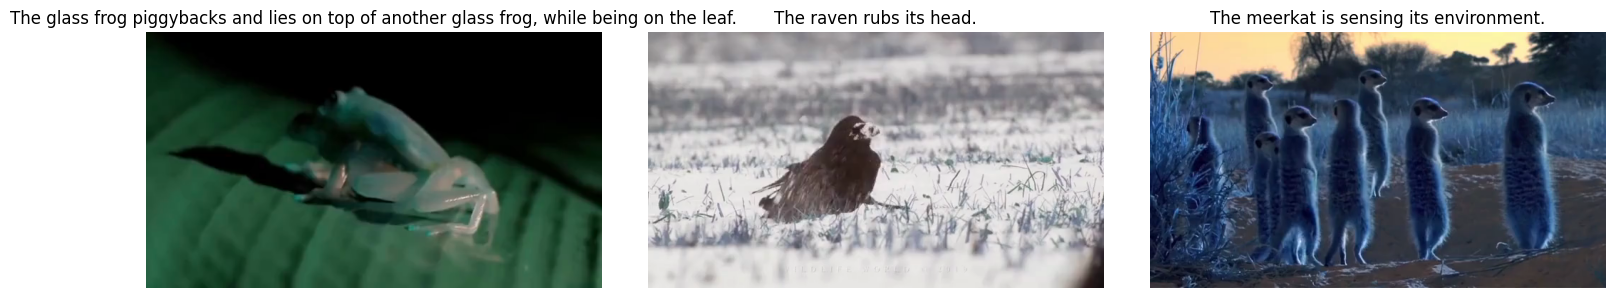

In [265]:
dataset = ak_vg_dataset(csv_file= "dataset_test.csv", root_dir= cwd)

fig = plt.figure()
fig.set_figwidth(15)

for i in range(len(dataset)):
    idx = np.random.randint(len(dataset))
    sample = dataset[idx]

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    plt.imshow(sample[0][0])
    plt.title(sample[1])

    if i == 2:
        plt.show()
        break